# Testing for Normality
Parametric models operate under the assumption that your data is normally distributed. If you use a parametric test on a non-parametric dataset, you may end up with unreliable or incorrect results. 

We can use a combination of both visualizations and statistical tests to measure the normalcy of our dataset, and the results of our test will help us decide on the proper model to use, as well as any sort of normalization that might need to be done beforehand. 

Let's first generate a set of random numbers using numpy: 

In [15]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
# generate gaussian data
from numpy.random import seed # set seed for reproducible results
from numpy.random import randn # import the random number pacakge
from numpy import mean # function to calc mean
from numpy import std # function to calc standard deviation

# seed the random number generator
seed(1)
# generate 100 random gaussian observations
data = pd.DataFrame({"nums":randn(100)})
print(data.head(10))

# summarize mean and std
print('mean=%.3f stdv=%.3f' % (mean(data), std(data)))

       nums
0  1.624345
1 -0.611756
2 -0.528172
3 -1.072969
4  0.865408
5 -2.301539
6  1.744812
7 -0.761207
8  0.319039
9 -0.249370
mean=0.061 stdv=0.885


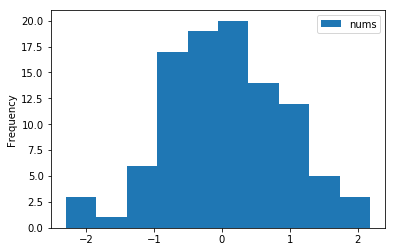

In [17]:
data.plot(kind='hist')